# Part A: Adaline Implementation

In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [201]:
class Adaline:
    def __init__(self, in_features=2, lr=0.01, stop_tolerance=1e-1): # DON'T CHANGE THIS METHOD
        """
        Initialize the Adaline model.

        Parameters:
        - in_features (int): Number of input features (default is 2).
        - lr (float): Learning rate for weight updates (default is 0.01).
        - stop_tolerance (float): Tolerance for stopping criterion (default is 1e-1).
        """
        np.random.seed(42)
        self.lr = lr
        self.stop_tolerance = stop_tolerance
        self.in_features = in_features
        self.b = np.random.random()
        self.weight = np.random.random(in_features)

    def forward(self, X):
        """
        Compute the net input for the given input features.

        Parameters:
        - X (numpy.ndarray): Input features.

        Returns:
        - net (numpy.ndarray): The computed net input.
        """
        # TODO: Implement the forward pass to compute the net input
        # Hint: Use the dot product of X and weights and add the bias.
        return np.dot(X, self.weight) + self.b

    def step(self, X, net, y):
        """
        Update weights and bias based on the error.

        Parameters:
        - X (numpy.ndarray): Input feature vector.
        - net (float): Computed net input.
        - y (float): Actual target value.

        Returns:
        - float: The largest weight change to monitor convergence.
        """
        # TODO: Update weights and bias based on the error
        # Hint: Use the Adaline learning rule. Calculate delta_w and delta_b.
        delta = net - y
        dw = delta * X
        db = delta
        self.weight -= self.lr * dw
        self.b -= self.lr * db
        return np.max(np.abs(dw))

    def train(self, X, Y, max_epochs=10):
        """
        Train the Adaline model using the provided data.

        Parameters:
        - X (numpy.ndarray): Input features for training.
        - Y (numpy.ndarray): Target labels for training.
        - max_epochs (int): Maximum number of training epochs (default is 10).
        """
        # TODO: Train the model until the stopping condition or max_epochs
        # Hint: Loop through epochs and update weights for each sample.
        for _ in range(max_epochs):
            largest_change = 0
            for x_i, y_i in zip(X, Y):
                output = self.forward(x_i)
                largest_change = max(largest_change, self.step(x_i, output, y_i))
            if largest_change < self.stop_tolerance:
                break

    def activation_function(self, X):
        """
        Apply the activation function (step function) to the net input.

        Parameters:
        - X (numpy.ndarray): Net input values.

        Returns:
        - numpy.ndarray: Activated output values.
        """
        # TODO: Implement the activation function (step function)
        return np.where(X >= 0.0, 1, -1)

    def predict(self, X):
        """
        Predict class labels for new input data.

        Parameters:
        - X (numpy.ndarray): Input features for prediction.

        Returns:
        - numpy.ndarray: Predicted class labels.
        """
        # TODO: Predict class labels for new inputs
        return self.activation_function(self.forward(X))

    def accuracy(self, X, y):
        """
        Calculate the accuracy of the predictions.

        Parameters:
        - X (numpy.ndarray): Input features for prediction.
        - y (numpy.ndarray): Actual target labels.

        Returns:
        - float: The accuracy of the model.
        """
        # TODO: Compute the accuracy of the predictions
        return np.mean(self.predict(X) == y)

    def plot_scatter(self, X, Y): # DON'T CHANGE THIS METHOD
        """
        Plot the scatter of input features and the decision boundary.

        Parameters:
        - X (numpy.ndarray): Input features.
        - Y (numpy.ndarray): Target labels.
        """
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=Y,
            cmap='tab20b',
            edgecolors="k",
            alpha=0.95,
        )
        h = 0.01
        xx, yy = np.meshgrid(np.arange(min(X[:, 0]) - 2, max(X[:, 0]), h) + 1,
                             np.arange(min(X[:, 1]) - 1, max(X[:, 1]), h) + 1)
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cm = plt.cm.tab20b
        plt.contourf(xx, yy, Z, cmap=cm, alpha=0.5)
        plt.title("Adaline Decision Boundary")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

In [202]:
# DON'T CHANGE THIS CELL

# Main code to load data, train, and visualize
def main():
    # Load the dataset
    df = pd.read_csv('./content/Madaline.csv', names=['x', 'y', 'label'], header=None)
    # Shuffle the dataset
    df = df.sample(frac=1)

    # Prepare inputs and targets
    data = df[['x', 'y']].to_numpy()
    target = df[['label']].to_numpy()

    # Convert labels to bipolar
    target[np.isclose(target, 0)] = -1

    # Create and train the Adaline model
    adaline = Adaline(in_features=2, lr=0.01, stop_tolerance=1e-1)

    # Flatten target for training
    adaline.train(data, target.flatten(), max_epochs=100)

    # Predict and calculate accuracy
    predictions = adaline.predict(data)
    accuracy = adaline.accuracy(data, target.flatten())
    print(f'Accuracy: {accuracy:.4f}')

    # Plot the results
    adaline.plot_scatter(data, target.flatten())

    # Create confusion matrix and classification report
    cm = confusion_matrix(target, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("confusion_matrix.pdf")
    plt.show()

    print(classification_report(target, predictions))

Accuracy: 0.6300


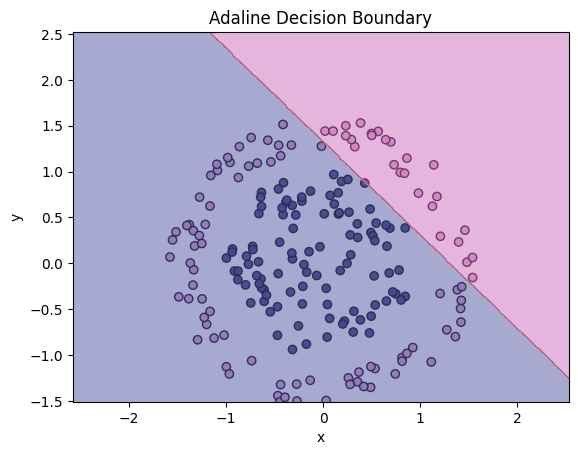

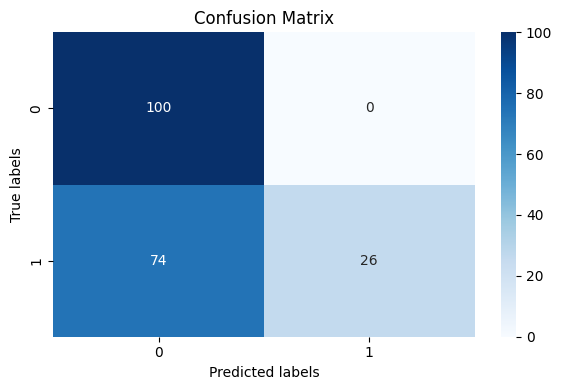

              precision    recall  f1-score   support

        -1.0       0.57      1.00      0.73       100
         1.0       1.00      0.26      0.41       100

    accuracy                           0.63       200
   macro avg       0.79      0.63      0.57       200
weighted avg       0.79      0.63      0.57       200



In [203]:
# DON'T CHANGE THIS CELL
# Execute main function
if __name__ == "__main__":
    main()

# Part B: Madaline Implementation

In [204]:
# The Madaline Network is considered to have 2 hidden layers for this class implementation
class MadalineClassifier:
    def __init__(self, csv_file, num_neurons_layer1=3, num_neurons_layer2=2, learning_rate=0.0001, max_iter=200):
        """
        Initialize the Madaline classifier.

        Parameters:
        - csv_file (str): Path to the CSV file containing the dataset.
        - num_neurons_layer1 (int): Number of neurons in the first layer (default is 3).
        - num_neurons_layer2 (int): Number of neurons in the second layer (default is 2).
        - learning_rate (float): Learning rate for weight updates (default is 0.0001).
        - max_iter (int): Maximum number of iterations for training (default is 200).
        """
        # DON'T CHANGE THIS METHOD
        self.df = pd.read_csv(csv_file, names=['x', 'y', 'label'], header=None)
        self.df = self.df.sample(frac=1)
        self.inputs = self.df[['x', 'y']].to_numpy()
        self.target = self.df[['label']].to_numpy()
        self.target[np.isclose(self.target, 0)] = -1
        self.num_neurons_layer1 = num_neurons_layer1
        self.num_neurons_layer2 = num_neurons_layer2
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.biases = None
        self.weights_layer2 = None
        self.biases_layer2 = None

    def plot_data(self): # DON'T CHANGE THIS METHOD
        """
        Plot the input data points in a scatter plot.

        The method visualizes the dataset by plotting the two classes with different colors.
        """
        df0 = self.df.loc[self.df['label'] == 0]
        df1 = self.df.loc[self.df['label'] == 1]

        plt.scatter(df0['x'], df0['y'], c="red", linewidths=2)
        plt.scatter(df1['x'], df1['y'], c="blue", linewidths=2)

        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(["Class 1", "Class 2"])
        plt.grid(True)
        plt.title("Scatter Plot")
        plt.tight_layout()
        plt.savefig("scatter_plot.pdf")
        plt.show()

    def initialize_weights(self, sm):
        """
        Initialize weights and biases for the Madaline model.

        Parameters:
        - sm (int): Size of the input data.

        This method initializes weights for the first and second layers, as well as biases.
        """
        # TODO: Implement the weight initialization method.
        # Hints:
        # 1. Initialize weights for the first layer.
        # 2. Initialize biases for the first layer.
        # 3. Initialize weights and biases for the second layer.

        np.random.seed(10)
        self.weights = np.random.randn(self.num_neurons_layer1, sm) 
        self.biases = np.random.randn(self.num_neurons_layer1)
        self.weights_layer2 = np.random.randn(self.num_neurons_layer2, self.num_neurons_layer1) 
        self.biases_layer2 = np.random.randn(self.num_neurons_layer2)

    def find_decision_boundary(self, start_x, end_x, weights, biases):
        """
        Calculate the decision boundary based on weights and biases.

        Parameters:
        - start_x (float): Starting x-value for the decision boundary.
        - end_x (float): Ending x-value for the decision boundary.
        - weights (numpy.ndarray): Weights for the layer.
        - biases (numpy.ndarray): Biases for the layer.

        Returns:
        - (numpy.ndarray, numpy.ndarray): x-coordinates and corresponding y-coordinates of the decision boundary.
        """
        # ToDo: Implement the decision boundary calculation.
        # Hints: You might calculate the output of the decision boundary
        # using the weights and biases.        
        x_values = np.linspace(start_x, end_x, 100)
        y_values = -(weights[0] * x_values + biases) / weights[1]
        return x_values, y_values

    def apply_activation_function(self, net):
        """
        Apply the activation function to the net input.

        Parameters:
        - net (numpy.ndarray): Net input values.

        Returns:
        - numpy.ndarray: Activated output values.
        """
        # ToDo: Implement the activation function. (Step Function)
        return np.where(net >= 0, 1, -1)
        # return 1 / (1 + np.exp(-net)) # sigmoid

    def forward_propagation(self, weights, inputs, biases, should_reshape):
        """
        Perform forward propagation through the network.

        Parameters:
        - weights (numpy.ndarray): Weights for the layer.
        - inputs (numpy.ndarray): Input data.
        - biases (numpy.ndarray): Biases for the layer.
        - should_reshape (bool): Indicates if inputs should be reshaped.

        Returns:
        - (numpy.ndarray, numpy.ndarray): Net input and activated output.
        """
        # ToDo: Implement forward propagation.
        # Hints:
        # 1. If should_reshape is True, reshape it to the correct shape.
        # 2. Calculate net_input

        # if should_reshape:
        #     inputs = inputs.reshape(-1, 1)

        net_input = np.dot(inputs, weights.T) + biases
        output = self.apply_activation_function(net_input)
        return net_input, output

    def update_weights(self, inputs, target, net_input, output):
    
        """
        Update the weights based on the target and output.

        Parameters:
        - inputs (numpy.ndarray): Input feature vector.
        - target (float): Actual target value.
        - net_input (float): Computed net input.
        - output (float): Activated output.

        Updates the weights and biases for the neurons based on the error.
        """
        # TODO: Implement the weight update logic.
        inputs = inputs.reshape((1, 2))
        net_input = net_input.reshape((self.num_neurons_layer1, 1))
        if target == output.all():
            return
        elif target == 1:
            argmax_neuron = np.argmax(net_input)
            self.weights[argmax_neuron] += self.learning_rate * np.dot((1 - net_input[argmax_neuron]), inputs)
            self.biases[argmax_neuron] += self.learning_rate * (1 - net_input[argmax_neuron])
        elif target == -1:
            pos_index = np.argwhere(net_input > 0)
            diff = self.learning_rate * (-1 - net_input)
            new_bias = self.biases + diff.reshape(-1)
            new_weights = self.weights + self.learning_rate * np.dot((-1 - net_input), inputs)

            for i in pos_index[:, 0]:
                self.weights[i] = new_weights[i]
                self.biases[i] = new_bias[i]

    def calculate_error(self, target, output):
        """
        Calculate the error based on the target and predicted output.

        Parameters:
        - target (numpy.ndarray): Actual target values.
        - output (numpy.ndarray): Predicted output values.

        Returns:
        - float: Calculated mean squared error.
        """
        # ToDo: Implement the error calculation.
        return np.mean((target - output) ** 2)

    def predict(self, inputs):
        """
        Predict class labels for the given input data.

        Parameters:
        - inputs (numpy.ndarray): Input data for prediction.

        Returns:
        - numpy.ndarray: Predicted class labels.
        """
        # TODO: Implement the prediction function.
        predicted_output = []
        biases_layer2 = self.num_neurons_layer1 - 1
        weights_layer2 = np.array([[1] * self.num_neurons_layer1])
        for i in range(inputs.shape[0]):
            _, output1 = self.forward_propagation(self.weights, inputs[i], self.biases, should_reshape=True)
            _, output2 = self.forward_propagation(weights_layer2, output1, biases_layer2, should_reshape=False)
            predicted_output.append(output2[0])
        return np.array(predicted_output)
    
        # exp_net = np.exp(output2 - np.max(output2, axis=1, keepdims=True))  # Subtract max for numerical stability
        # return exp_net / np.sum(exp_net, axis=1, keepdims=True)

    def train(self):
        """
        Train the Madaline model on the input data.

        This method implements the training loop for the Madaline model.
        """
        # TODO: Implement the training loop.
        # Hints:
        # 1. Shuffle the dataset and reset the index.
        # 2. Initialize necessary variables.
        # 3. You might want to perform forward & backward prop.

        self.df = self.df.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset
        self.initialize_weights(self.inputs.shape[1])
        errors = []
        for epoch in range(self.max_iter):
            net_input1, output1 = self.forward_propagation(self.weights, self.inputs, self.biases, False)
            _, output2 = self.forward_propagation(self.weights_layer2, output1, self.biases_layer2, True)
                
            for i in range(len(self.inputs)):
                self.update_weights(self.inputs[i], self.target[i], net_input1[i], output1[i])

            error = self.calculate_error(self.target, output2)
            errors.append(error)

            if error < 1e-3:
                print(f"early stopped at epoch {epoch}")
                break
            
        # predicted_output = self.predict(self.inputs)
        # concat = np.concatenate((predicted_output.reshape(-1,1),self.target),axis=1)
        # print(f"final output of predict and actual label:\n {concat}\n")

        class0_data = self.df.loc[self.df['label'] == 0]
        class1_data = self.df.loc[self.df['label'] == 1]

        self.plot_error(errors, class0_data, class1_data)

        return self.weights, self.biases, errors

    def plot_error(self, error_list, df0, df1): # DON'T CHANGE THIS METHOD
        """
        Plot the training error and decision boundaries.

        Parameters:
        - error_list (list): List of mean squared error values for each epoch.
        - df0 (DataFrame): DataFrame containing class 0 data.
        - df1 (DataFrame): DataFrame containing class 1 data.
        """
        plt.plot(error_list)
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Error Plot')
        plt.grid(True)
        plt.savefig('error_plot.pdf')
        plt.show()

        plt.scatter(df0['x'], df0['y'], c="red", linewidths=0.1)
        plt.scatter(df1['x'], df1['y'], c="blue", linewidths=0.1)

        for i in range(self.num_neurons_layer1):
            px1, px2 = self.find_decision_boundary(-2, 2, self.weights[i], self.biases[i])
            plt.plot(px1, px2)

        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(["Class 1", "Class 2"])
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.savefig('error_plot1.pdf')
        plt.show()

        predicted_output = self.predict(self.inputs)
        cm = confusion_matrix(self.target, predicted_output)

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.tight_layout()
        plt.savefig("confusion_matrix.pdf")
        plt.show()

        print(classification_report(self.target, predicted_output))   

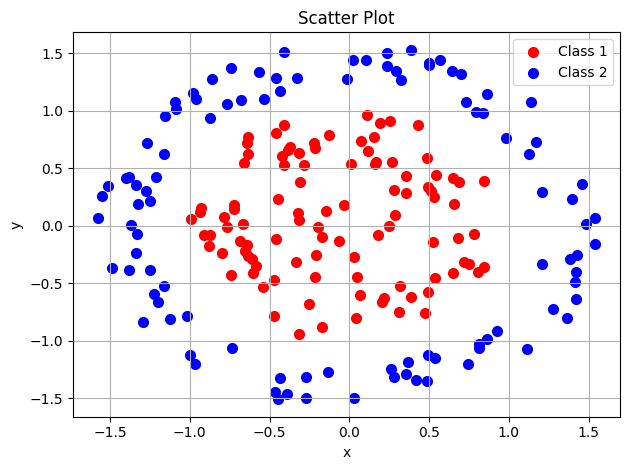

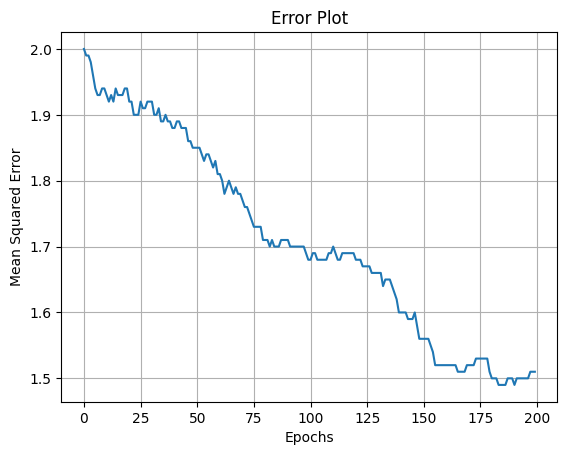

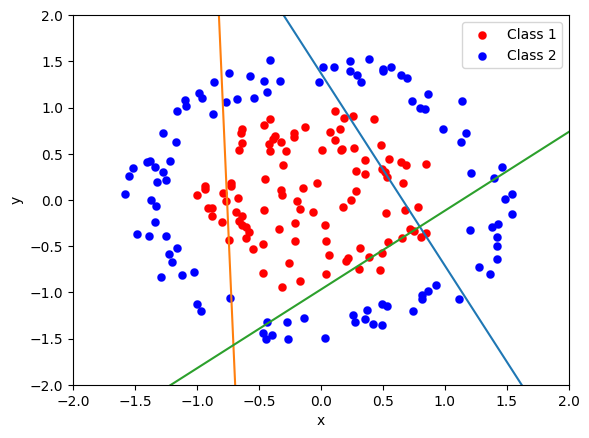

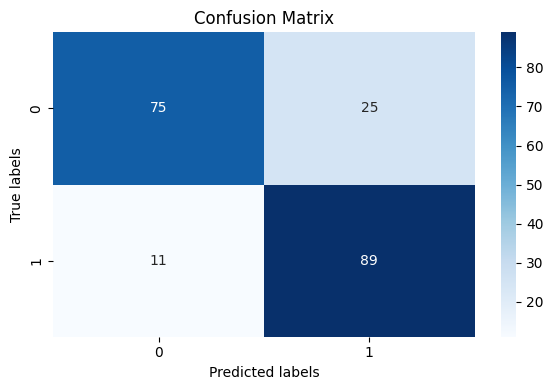

              precision    recall  f1-score   support

        -1.0       0.87      0.75      0.81       100
         1.0       0.78      0.89      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [205]:
# DON'T CHANGE THIS CELL
# Usage
classifier = MadalineClassifier('./content/Madaline.csv', num_neurons_layer1=3, num_neurons_layer2=2, max_iter=200)
classifier.plot_data()
weights, biases, error_list = classifier.train()

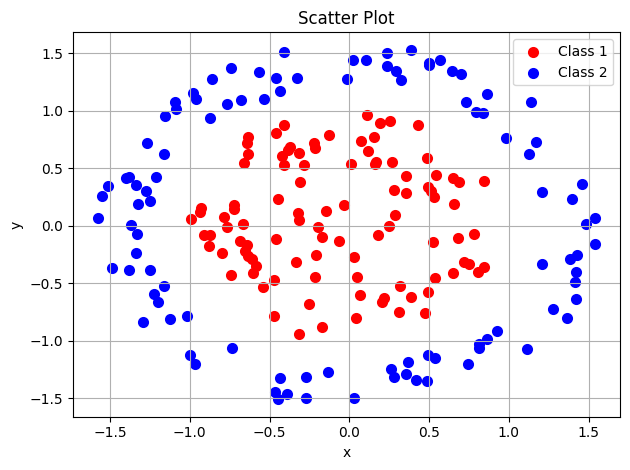

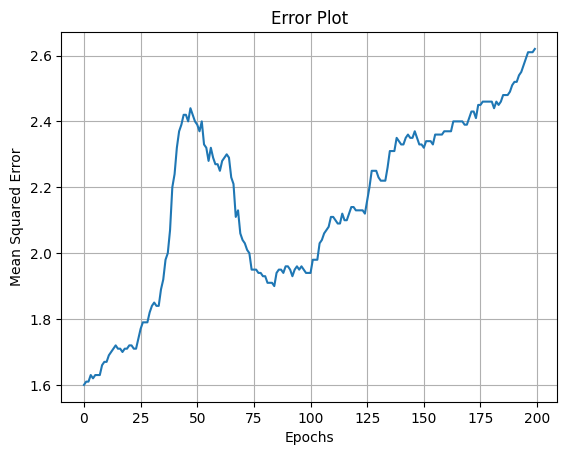

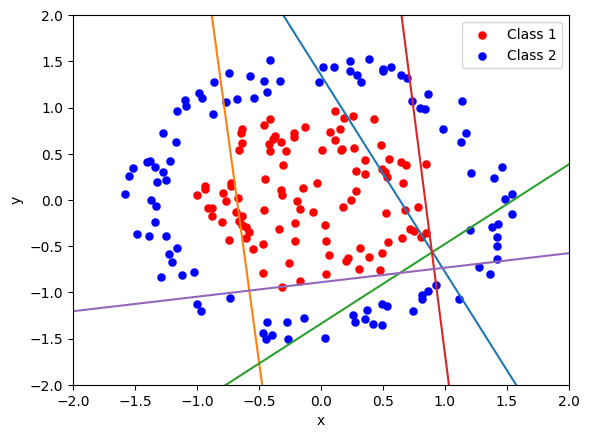

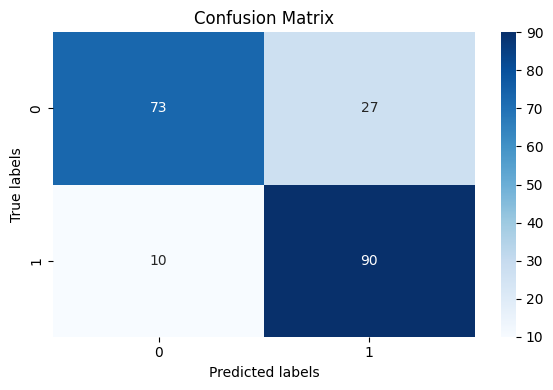

              precision    recall  f1-score   support

        -1.0       0.88      0.73      0.80       100
         1.0       0.77      0.90      0.83       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



In [206]:
# DON'T CHANGE THIS CELL
# Usage
classifier = MadalineClassifier('./content/Madaline.csv', num_neurons_layer1=5, num_neurons_layer2=2, max_iter=200)
classifier.plot_data()
weights, biases, error_list = classifier.train()

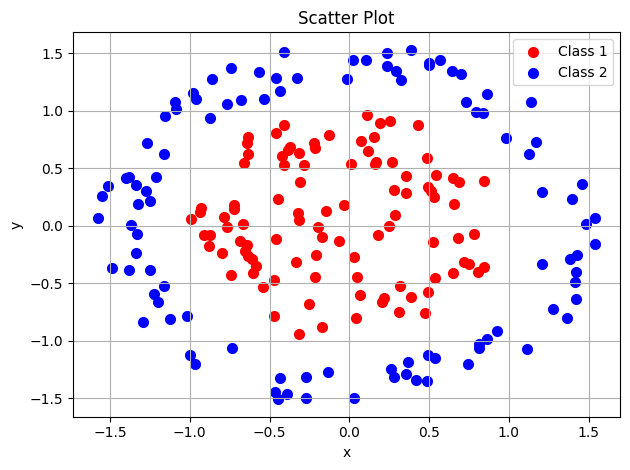

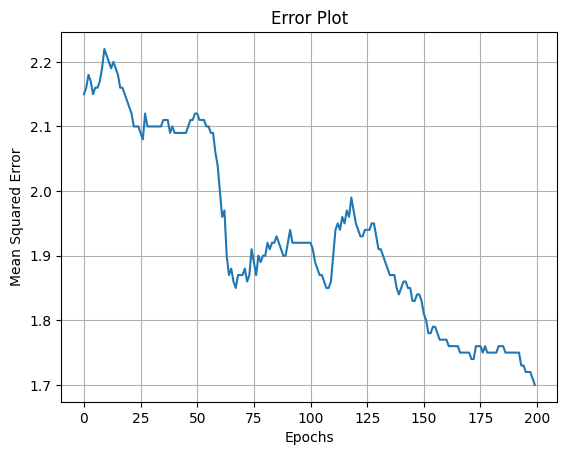

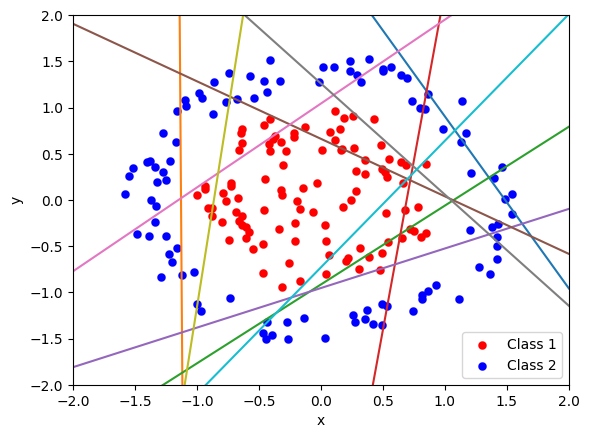

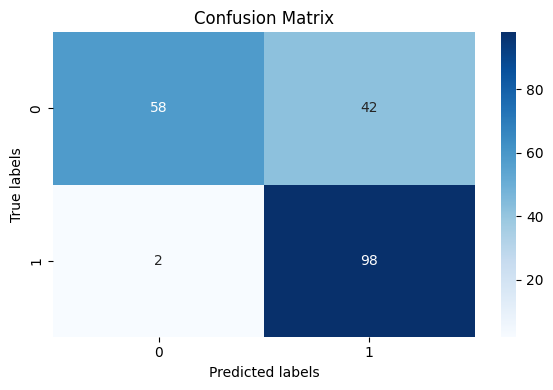

              precision    recall  f1-score   support

        -1.0       0.97      0.58      0.72       100
         1.0       0.70      0.98      0.82       100

    accuracy                           0.78       200
   macro avg       0.83      0.78      0.77       200
weighted avg       0.83      0.78      0.77       200



In [207]:
# DON'T CHANGE THIS CELL
# Usage
classifier = MadalineClassifier('./content/Madaline.csv', num_neurons_layer1=10, num_neurons_layer2=2, max_iter=200)
classifier.plot_data()
weights, biases, error_list = classifier.train()